#Assignment 1
##Gaurav Lodhi
#### MT19063

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [39]:
data=pd.read_csv("protein.edgelist.txt" ,sep='\t',header=None)


In [40]:
data.head()

,0,1
0,0,1050
1,1,229
2,2,229
3,3,467
4,4,1228


In [41]:
print(max(list(data[0])),min(list(data[0])),max(list(data[1])),min(list(data[1])))

2017 0 2017 7


In [42]:
n=max(list(data[0])+list(data[1]))+1
print("No of Nodes in dataset:",n)
print("No of Edges in dataset:",len(data))

No of Nodes in dataset: 2018
No of Edges in dataset: 2930


## Q1.: (a) Network represantation in terms of its ‘adjacency matrix’ as well as ‘edge list'.


In [43]:
adj_matrix=np.array([[0 for x in range(n)] for y in range(n)])

In [44]:
# print(adj_matrix)

In [45]:
edge_list=[]
adj_list={}
for i in range(n):
  adj_list[i]=[]
for i in range(len(data[0])):
  edge_list.append((data[0].iloc[i],data[1].iloc[i]))
  adj_matrix[data[0].iloc[i]][data[1].iloc[i]]=1
  adj_list[data[0].iloc[i]].append(data[1].iloc[i])
print(edge_list)
print(adj_list)
print(len(set(data[0])))
print(len(set(data[1])))

[(0, 1050), (1, 229), (2, 229), (3, 467), (4, 1228), (5, 229), (6, 94), (7, 7), (8, 971), (8, 1620), (9, 63), (10, 1056), (10, 1514), (10, 1530), (10, 1701), (11, 935), (12, 1877), (13, 330), (14, 490), (14, 504), (14, 537), (14, 1056), (14, 1375), (14, 1400), (14, 1651), (14, 1912), (15, 731), (15, 806), (15, 1133), (15, 1186), (16, 394), (16, 504), (16, 1400), (16, 1804), (17, 1022), (18, 135), (19, 370), (19, 627), (19, 1645), (19, 1657), (20, 370), (20, 627), (20, 1225), (21, 1606), (22, 420), (22, 1282), (22, 1637), (23, 267), (23, 813), (24, 594), (25, 1347), (26, 123), (26, 388), (27, 1076), (28, 617), (29, 29), (30, 30), (30, 31), (30, 82), (30, 372), (30, 488), (30, 553), (30, 596), (30, 707), (30, 748), (30, 866), (30, 1051), (30, 1057), (30, 1096), (30, 1103), (30, 1352), (30, 1377), (30, 1443), (30, 1498), (30, 1646), (30, 1660), (30, 1674), (30, 1741), (30, 1876), (30, 1987), (30, 2001), (31, 31), (31, 1051), (32, 140), (32, 203), (33, 33), (33, 688), (33, 1987), (34, 577)

In [46]:
print(adj_matrix)
# for x in adj_matrix:
#     print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


## (b) Network visualization.

##### Q1b.png image is added in the folder.



### Q1.(c) Comment on sparseness:



In [47]:
print("Possible max no of edges:",n*(n-1)/2)
print("Available no of edges",len(edge_list))
print("Edge Fraction: ",len(edge_list)/(n*(n-1)/2))
from itertools import combinations

Possible max no of edges: 2035153.0
Available no of edges 2930
Edge Fraction:  0.0014396951973635397


#### Observations:
#####1. As we can see available no of edges are very less than max no of possible edges ( <2%) so this graph is highly sparse.
###### 2. Real Edge Fraction is very less.

### (d) Average degree < 𝑘 >. 

In [48]:
adj_matrix_df=pd.DataFrame(adj_matrix)
degree=[0 for x in range(n)]
for x in range(n):
  degree[x]=len(adj_list[x])
  degree[x]=sum(adj_matrix_df.iloc[x])+sum(adj_matrix_df[x])
# print(degree)
print("Average degree:", sum(degree)/len(degree))

Average degree: 2.9038652130822595


### Q1(e). ‘Scaled degree distribution’, 𝑝𝑘 × 𝑘. plot.

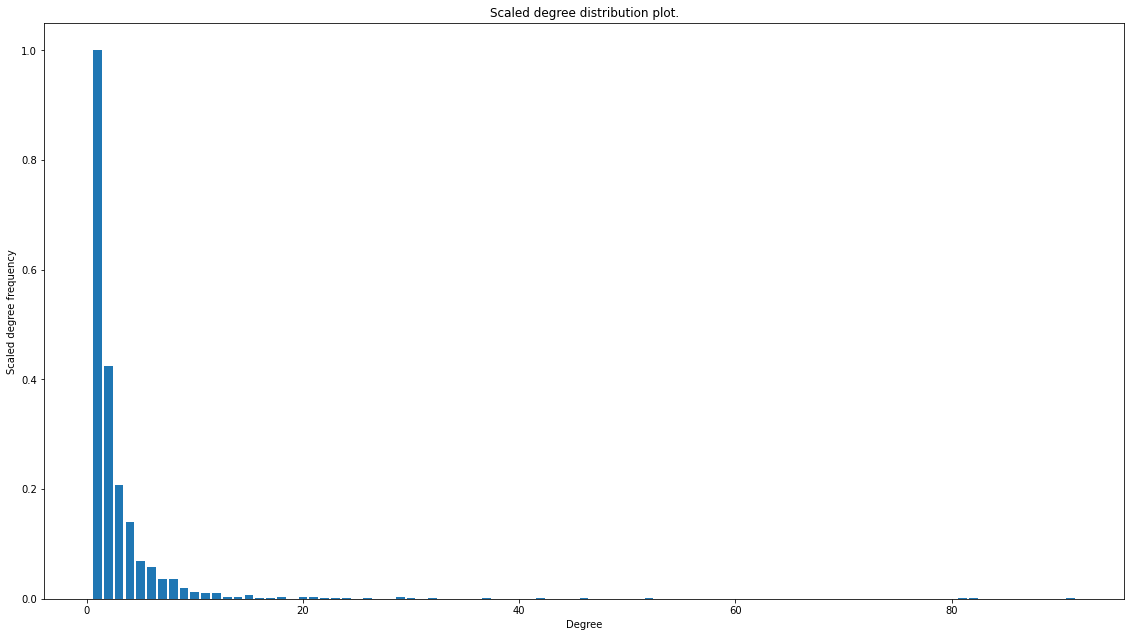

In [49]:

degree_counter=dict(Counter(degree))
max_count=max(degree_counter.values())
for d, count in degree_counter.items():
  degree_counter[d]=count/max_count
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'Scaled degree distribution plot.')
ax.set_xlabel('Degree')
ax.set_ylabel('Scaled degree frequency')
sorted_degree_dict=dict(sorted(degree_counter.items()))
ax.bar(*zip(*sorted_degree_dict.items()))

plt.show()


### Q1.(f).
(a). Analysing the Graph components.<br>
(b). Taking the max size component.

In [50]:

node_list=list(set(list(data[0])+list(data[1])))
count_list=list(np.zeros(len(node_list)).astype(int))
ct=1
source=list(set(list(data[0])))
for src in source:
    if count_list[src]==0:
        queue=[]
        queue.append(src)
        while len(queue)!=0:
            node=queue.pop(0)
            count_list[node]=ct
            neighbours=adj_list[node]
            for neighbour in neighbours:
                if count_list[neighbour]==0:
                    queue.append(neighbour)
        ct+=1


# for n in neighbours_combination_list:

#             if adj_matrix[n]==1:
#                 num_of_links+=1
#         if degree==1 or degree==0:
#             clustering_coeff=0
#         else:
#             clustering_coeff=2*num_of_links/(degree*(degree-1))
#         total_clustering_coeff+=clustering_coeff
max_component_size=max(count_list,key=count_list.count)
max_connected_component_list=sorted([i for i,val in enumerate(count_list) if val==max_component_size])
print(max_connected_component_list)
total_path_length=0
number_of_paths=(len(max_connected_component_list)*(len(max_connected_component_list)-1)/2)
diameter=0
for node in max_connected_component_list:
    distance_list=list(np.zeros(len(node_list)).astype(int))
    count_list=list(np.zeros(len(node_list)).astype(int))
    label=1
    if count_list[node]==0:
        src=node
        queue=[]
        queue.append(src)
        distance=0
        while len(queue)!=0:
            front=queue.pop(0)
            count_list[front]=label
            neighbours=adj_list[front]
            for neighbour in neighbours:
                if count_list[neighbour]==0:
                    queue.append(neighbour)
                    if distance_list[neighbour]>distance_list[front]+1 or distance_list[neighbour]==0:
                        distance_list[neighbour]=distance_list[front]+1
    #print(node,sum(distance_list),max(distance_list))
    total_path_length+=sum(distance_list)
    diameter=max(diameter,max(distance_list))
print("Average Path Length for the graph",(total_path_length/number_of_paths/2))
print("Diameter:",diameter)

# for node in max_connected_component_list:
#     distance_list=list(np.zeros(len(node_list)).astype(int))
#     count_list=list(np.zeros(len(node_list)).astype(int))

clustering_coeff_dict={}
total_clustering_coeff=0
for node in max_connected_component_list:
    clustering_coeff=0
    if node in set(list(adj_list)):
        dest_nodes=adj_list[node]
        degree=len(dest_nodes)
        neighbours_combination_list=list(combinations(dest_nodes, 2))
        num_of_links=0
        for n in neighbours_combination_list:
            if adj_matrix[n]==1:
                num_of_links+=1
        if degree==1 or degree==0:
            clustering_coeff=0
        else:
            clustering_coeff=2*num_of_links/(degree*(degree-1))
        total_clustering_coeff+=clustering_coeff
    clustering_coeff_dict[node]=clustering_coeff
print("Average clustering coefficient for the graph ",(total_clustering_coeff/len(max_connected_component_list)))



[13, 330, 392, 401, 441, 504, 528, 532, 571, 584, 648, 651, 671, 672, 676, 680, 723, 758, 793, 817, 837, 857, 859, 863, 871, 889, 929, 945, 948, 1013, 1021, 1034, 1042, 1055, 1121, 1139, 1141, 1151, 1154, 1159, 1161, 1167, 1186, 1195, 1200, 1213, 1225, 1253, 1289, 1290, 1293, 1304, 1306, 1314, 1324, 1337, 1344, 1359, 1365, 1370, 1373, 1377, 1385, 1407, 1410, 1428, 1441, 1496, 1504, 1526, 1538, 1540, 1541, 1542, 1548, 1551, 1552, 1556, 1572, 1582, 1591, 1593, 1598, 1601, 1602, 1604, 1612, 1623, 1628, 1642, 1666, 1684, 1709, 1713, 1716, 1718, 1723, 1724, 1730, 1732, 1737, 1738, 1748, 1749, 1753, 1759, 1787, 1792, 1793, 1794, 1804, 1806, 1811, 1824, 1847, 1849, 1857, 1861, 1872, 1880, 1882, 1885, 1900, 1904, 1911, 1916, 1944, 1964, 1970, 1987, 1992, 1998, 2009, 2015]
Average Path Length for the graph 0.5085287846481876
Diameter: 8
Average clustering coefficient for the graph  0.028107325566896782


### Q2.Python script for computing in/out-degree for directed graphs.
##### Using above data for this question.

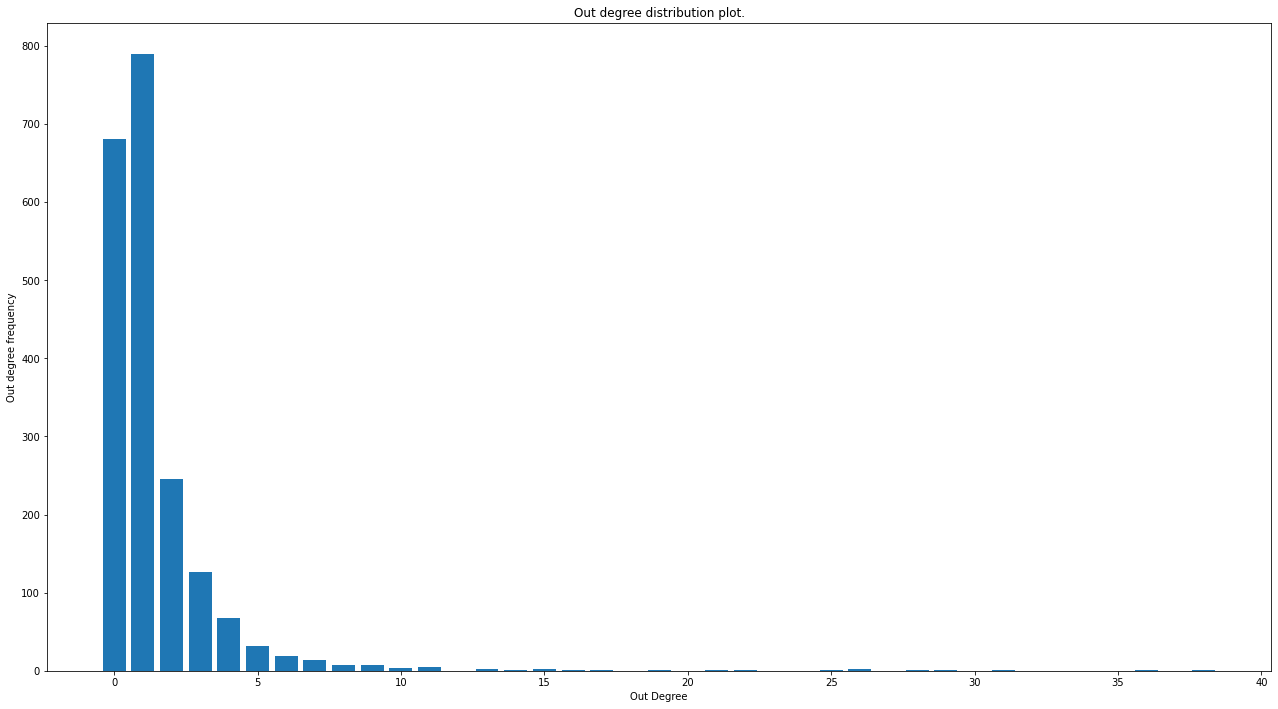

{1: 790, 2: 246, 4: 68, 8: 8, 3: 126, 25: 1, 7: 14, 0: 681, 10: 4, 5: 32, 6: 19, 11: 5, 38: 1, 9: 7, 13: 2, 19: 1, 16: 1, 28: 1, 22: 1, 26: 2, 17: 1, 29: 1, 31: 1, 14: 1, 15: 2, 36: 1, 21: 1}


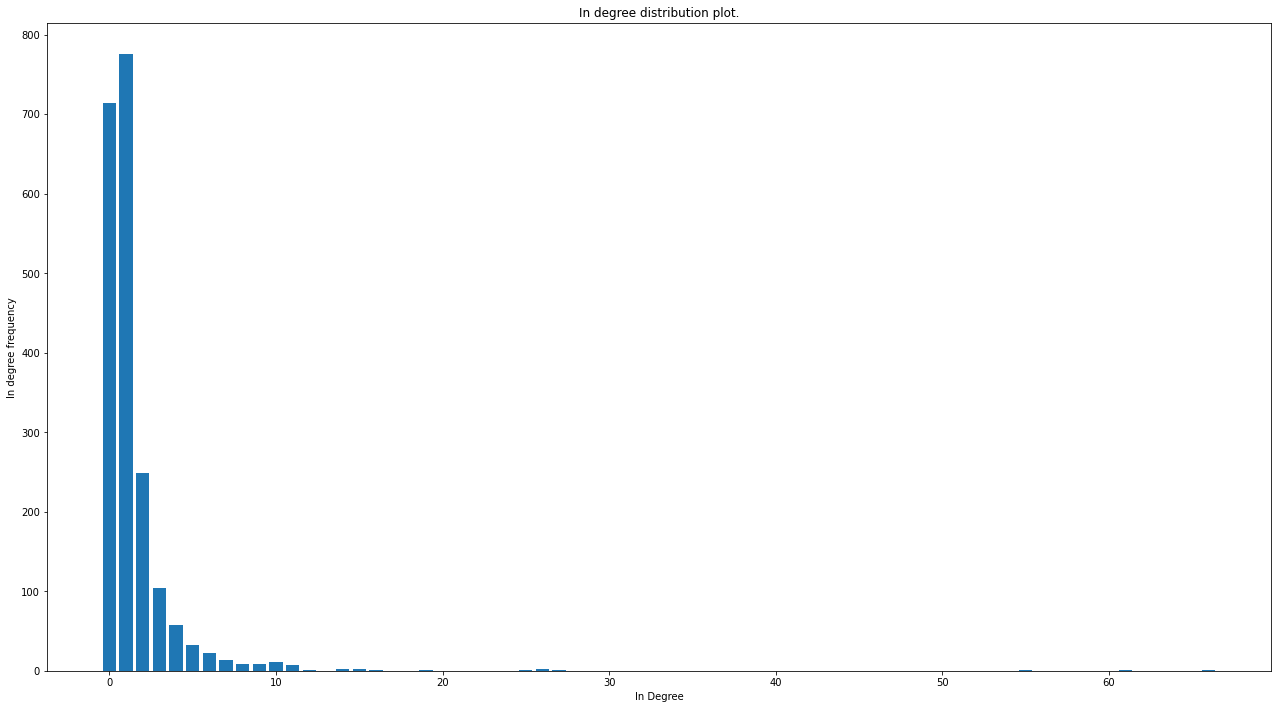

{0: 714, 1: 776, 2: 249, 4: 58, 3: 104, 5: 32, 6: 22, 8: 9, 15: 2, 10: 11, 11: 7, 7: 14, 26: 2, 9: 8, 55: 1, 61: 1, 14: 2, 19: 1, 16: 1, 66: 1, 12: 1, 25: 1, 27: 1}


In [51]:
out_degree=adj_matrix.sum(axis=1)
in_degree=adj_matrix.sum(axis=0)
degree_counter=dict(Counter(out_degree))
max_count=max(degree_counter.values())
for d, count in degree_counter.items():
  degree_counter[d]=count
fig = plt.figure(figsize=(17,9))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'Out degree distribution plot.')
ax.set_xlabel('Out Degree')
ax.set_ylabel('Out degree frequency')
sorted_degree_dict=dict(sorted(degree_counter.items()))
ax.bar(*zip(*sorted_degree_dict.items()))
plt.show()
print(degree_counter)

degree_counter=dict(Counter(in_degree))
max_count=max(degree_counter.values())
for d, count in degree_counter.items():
  degree_counter[d]=count
fig = plt.figure(figsize=(17,9))
ax = fig.add_axes([0,0,1,1])
ax.set_title( 'In degree distribution plot.')
ax.set_xlabel('In Degree')
ax.set_ylabel('In degree frequency')
sorted_degree_dict=dict(sorted(degree_counter.items()))
ax.bar(*zip(*sorted_degree_dict.items()))
plt.show()
print(degree_counter)



### Q3.
Notion of ‘degree’ and ‘clustering coefficient’ for a weighted network to account for the edge weights. It is different from the previous approach in which we take node degree as no of links connected to the perticular node but instead of it here we are taking sum of weights of connected links. 

In [52]:
# Returns Degree Distribution 
def degree_distribution(adjm):
   adjm=np.asarray(adjm)
   degrees=adjm.sum(axis=0)
   count_no=Counter(degrees)
   l=count_no.keys()
   degree,count_values=zip(*count_no.items())
   return np.asarray(degree),np.asarray(count_values)

In [53]:
# reading new data
data3=pd.read_csv('bio-CE-LC.edges', sep=' ', header= None)
data3.columns=['start','end','weight']
data3.to_csv('bio-CE-LC.edges_df.csv',header=False,index=False)
nodes3 = len(np.unique(data3))
print("No. of Nodes in a graph ",nodes3)
edges =len(data3)/2
print("No. of edges in a graph ",edges)

No. of Nodes in a graph  1554
No. of edges in a graph  824.0


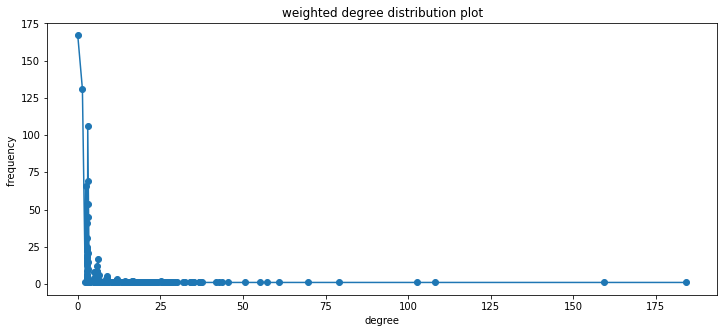

In [57]:
    
adjm3=[]
copy=[]
for i in range(nodes3):
 adjm3.append(np.zeros(nodes3))
 copy.append(np.zeros(nodes3))
for i in range(data3.shape[0]):
   adjm3[int(data3.iloc[i][0])][int(data3.iloc[i][1])]=data3.iloc[i][2]
   adjm3[int(data3.iloc[i][1])][int(data3.iloc[i][0])]=data3.iloc[i][2]
   copy[int(data3.iloc[i][0])][int(data3.iloc[i][1])]=1
   copy[int(data3.iloc[i][1])][int(data3.iloc[i][0])]=1

x,y=degree_distribution(adjm3)

zipped3 = zip(x, y)
zipped3 = list(zipped3)
res = sorted(zipped3, key = lambda x: x[0])
scaled_x3=[]
scaled_y3=[]
plt.figure(figsize=(12,5))
for i in range(len(res)):
   scaled_x3.append(res[i][0])
   scaled_y3.append(res[i][1])
plt.title("weighted degree distribution plot")
plt.xlabel("degree")
plt.ylabel("frequency ")
plt.plot(scaled_x3, scaled_y3,marker='o')

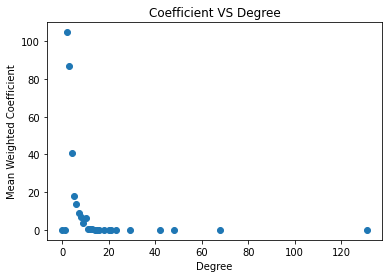

In [58]:
for i in range (len (adjm3)):
 for j in range (len (adjm3)):
   if i ==j :
     adjm3[i][j]=0



coef=[]
for i in range (len (adjm3 )):
 elem=i      #pick up element

# see neighbours from adjm3rix and put them in list
 neighbour_elem=[]
 for j in range(len(adjm3[i])):
   if adjm3[i][j]>0:
     neighbour_elem.append(j)
 
 
# for each neighbour in neighbour list -->> check for link with other neighbours in the list
 count=0
 n = copy[i].sum(axis=0) # neighbours
 for p in neighbour_elem:
   for e in neighbour_elem:
     if adjm3[p][e]>0:
       count=count+adjm3[p][e]
 count=count/2   # links

 if(n==0 or n==1):
       coef.append(0.0)
 else:
     coef.append ( 2* count /(n*(n-1) ))

# print("Average clustering coefficient ->", np.nan_to_num(np.asarray(coef)).mean())

degree=np.asarray(copy).sum(axis=0)

dictt={}
for i in range(len(degree)):
   if degree[i] in dictt.keys():
       dictt[degree[i]].append(coef[i])
   else:
       dictt[degree[i]]=[coef[i]]


plt.scatter(dictt.keys(), [np.sum(x) for x in dictt.values()])
plt.xlabel('Degree')
plt.ylabel('Mean Weighted Coefficient')
plt.title('Coefficient VS Degree')
plt.show()

# Q4:

In [55]:
data4=pd.read_csv("protein.edgelist.txt" ,sep='\t',header=None)
node4=max(list(data4[0])+list(data4[1]))+1
print("No of nodes:",n)
n=node4
# k=0
edge_list=[]
adj_list={}
for i in range(n):
  adj_list[i]=[]
for i in range(len(data4[0])):
  edge_list.append([data4[0].iloc[i],data4[1].iloc[i]])
  adj_matrix[data4[0].iloc[i]][data4[1].iloc[i]]=1
  adj_list[data4[0].iloc[i]].append(data4[1].iloc[i])
# edge_list.sort()
print(edge_list)
print(adj_list)


No of nodes: (1804, 2015)
[[0, 1050], [1, 229], [2, 229], [3, 467], [4, 1228], [5, 229], [6, 94], [7, 7], [8, 971], [8, 1620], [9, 63], [10, 1056], [10, 1514], [10, 1530], [10, 1701], [11, 935], [12, 1877], [13, 330], [14, 490], [14, 504], [14, 537], [14, 1056], [14, 1375], [14, 1400], [14, 1651], [14, 1912], [15, 731], [15, 806], [15, 1133], [15, 1186], [16, 394], [16, 504], [16, 1400], [16, 1804], [17, 1022], [18, 135], [19, 370], [19, 627], [19, 1645], [19, 1657], [20, 370], [20, 627], [20, 1225], [21, 1606], [22, 420], [22, 1282], [22, 1637], [23, 267], [23, 813], [24, 594], [25, 1347], [26, 123], [26, 388], [27, 1076], [28, 617], [29, 29], [30, 30], [30, 31], [30, 82], [30, 372], [30, 488], [30, 553], [30, 596], [30, 707], [30, 748], [30, 866], [30, 1051], [30, 1057], [30, 1096], [30, 1103], [30, 1352], [30, 1377], [30, 1443], [30, 1498], [30, 1646], [30, 1660], [30, 1674], [30, 1741], [30, 1876], [30, 1987], [30, 2001], [31, 31], [31, 1051], [32, 140], [32, 203], [33, 33], [33, 6

2018
0.0014396951973635397


Text(0.5, 1.0, '')

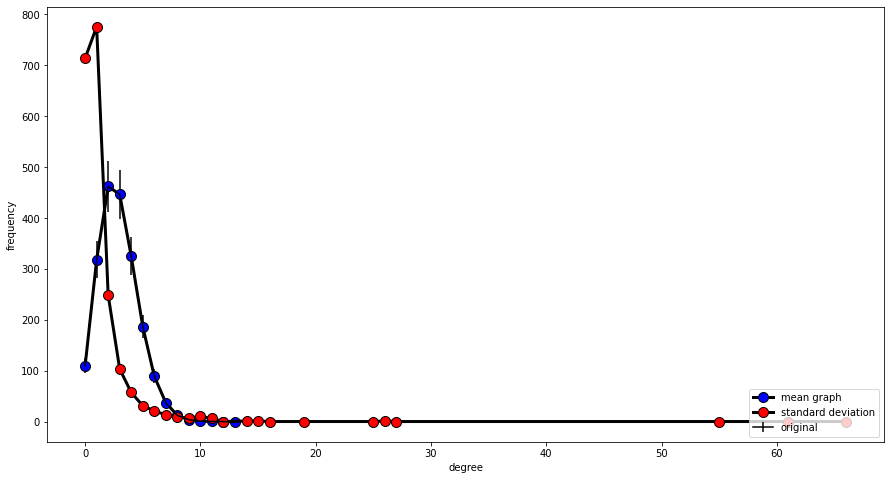

In [56]:
counter={}
n=node4
print(n)
tn=n*(n-1)/2 
ed=len(edge_list)
p=ed/tn
print(p)
from random import *
degree_list_per_iteration=[]
for x in range (100):
  gilbert_adj_matrix=np.array([[0 for x in range(n)] for y in range(n)])
  for i in range(n):
    for j in range(i):
      prob=random()
      if(prob<p):
        gilbert_adj_matrix[i][j]=1
        gilbert_adj_matrix[j][i]=1
        
  x,y=degree_distribution(np.asarray(gilbert_adj_matrix))

  for i in range(len(x)):
      if x[i] in counter:
          counter[x[i]].append(y[i])
      else:
          counter[x[i]]=[]
          counter[x[i]].append(0)


##calculating mean and standard deviation for all iterations
x=[]
mean_=[]
std_=[]
for i in counter.keys():
    x.append(i)
    mean_.append(np.mean(counter[i]))
    std_.append(np.std(counter[i]))
zipped = zip(x, mean_ , std_)
zipped = list(zipped)
res = sorted(zipped, key = lambda x: x[0])
x=[]
mean_=[]
std_=[]
for i in range(len(res)):
    x.append(res[i][0])
    mean_.append(res[i][1])
    std_.append(res[i][2])
plt.figure(figsize=(15,8))
plt.plot(x, mean_  , color='black', linewidth = 3, marker='o', markerfacecolor='blue', markersize=10)
# ax.bar()
plt.plot(*zip(*sorted_degree_dict.items()) , color='black', linewidth = 3, marker='o', markerfacecolor='red', markersize=10)
plt.errorbar(x,mean_ , yerr = std_,color='black')
plt.legend(["mean graph", "standard deviation",'original'], loc ="lower right") 
plt.xlabel('degree')
plt.ylabel('frequency')
plt.title('')

# Q5: 

### Visualization .png is added in folder.